# plot design from existing cv GLM models

In [ ]:
%load_ext autoreload
%autoreload 2
import cascade as cas
import flow
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd
import warnings
from cascade import utils
from scipy.stats import pearsonr

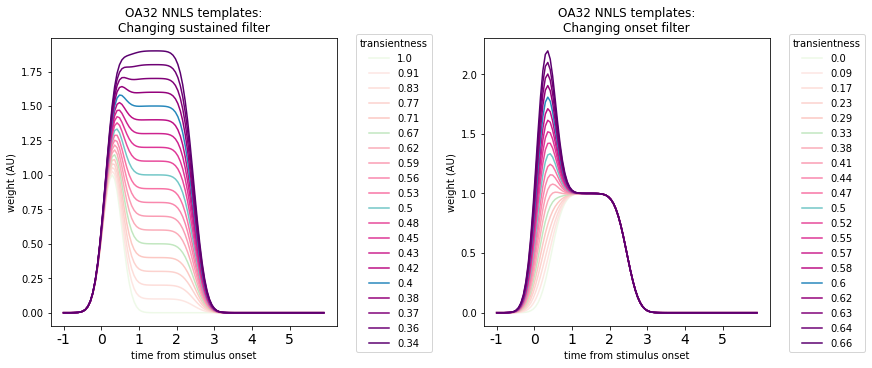

In [232]:
cas.adaptation.plot_test_of_template('OA32')

In [2]:
# set parameters for running GLM
mice = cas.lookups.mice['all15']
words = ['facilitate'] * len(mice)
trace_type = 'zscore_day'
folder_name = 'cvGLM trial history motor interactions FA nomiss'
group_by = 'learning'
nan_thresh = 0.95
score_threshold = 0.8

# set rank
rank_num = 15

save_folder = cas.paths.save_dir_groupmouse(
        mice,
        folder_name,
        method='ncp_hals',
        nan_thresh=0.95,
        score_threshold=0.8,
        pars=None,
        words=words,
        rank_num=rank_num,
        grouping='group',
        group_pars={'group_by': group_by})
all_mddev_df = pd.read_pickle(os.path.join(save_folder, 'cvGLM_delta_deviance_df.npy'))
all_mfdev_df = pd.read_pickle(os.path.join(save_folder, 'cvGLM_fractional_deviance_df.npy'))
all_mdev_df = pd.read_pickle(os.path.join(save_folder, 'cvGLM_model_performance_df.npy'))
print('\nloaded.')

Mice hashed: counted
cascade.paths: Assuming default pars: cs: '', warp: '', trace_type: zscore_day

loaded.


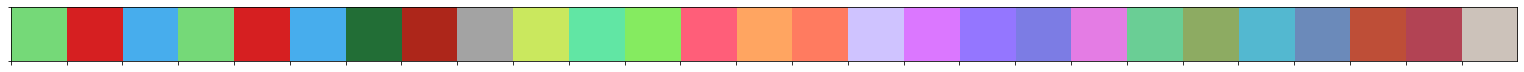

In [3]:
sns.palplot(cas.lookups.color_dict.values())

In [143]:
# set parameters for running GLM
# mice = cas.lookups.mice['all12']
# words = ['facilitate'] * len(mice)
# group_by = 'learning'

# load in a full size tensor
model_list = []
tensor_list = []
id_list = []
bhv_list = []
meta_list = []
for mouse, word in zip(mice, words):
    
    # return   model, ids, tensor, meta, bhv
    out = cas.load.load_all_groupday(mouse, word=word, with_model=True, group_by=group_by, nan_thresh=0.95)
    model_list.append(out[0])
    tensor_list.append(out[2])
    id_list.append(out[1])
    bhv_list.append(out[4])
    meta_list.append(out[3])

staging_list = []
for meta, model in zip(meta_list, model_list):
    df = cas.tuning.component_tuning(meta, model, 15, by_stage=False, staging='parsed_11stage')
    staging_list.append(df)

test = pd.concat(staging_list, axis=0)

Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match le

In [ ]:
trigger_list = []
for meta in meta_list:
    mouse = meta.reset_index()['mouse'].unique()[0]
    plt.figure()
    days = meta.reset_index()['date'].unique()
    first100 = cas.adaptation._first100_bool(meta)
    m_stack = np.zeros((len(days), 100))
    m_stack[:] = np.nan
    for c, di in enumerate(days):
        dboo = meta.reset_index()['date'].isin([di]).values & first100
        speed_vec = meta['anticipatory_licks'].values[dboo]
        t_vec = np.arange(len(speed_vec))
        m_stack[c, t_vec] = speed_vec/cas.lookups.stim_length[mouse]
    plt.plot(m_stack.T, '-o', alpha=0.3)
    plt.plot(np.nanmean(m_stack, axis=0), color='black', linewidth=3)
    
    trigger_list.append(np.nanmean(m_stack, axis=0))

plt.figure()
plt.plot(np.nanmean(np.vstack(trigger_list), axis=0), color='black', linewidth=3)

In [7]:
test = cas.adaptation.calc_daily_transientness(
        mice,
        words=words,
        method='ncp_hals',
        cs='',
        warp=False,
        trace_type='zscore_day',
        group_by=group_by,
        nan_thresh=nan_thresh,
        score_threshold=score_threshold,
        rank=20,
        annotate=True,
        over_components=False)
# test = cas.adaptation.calc_daily_transientness(
#         mice,
#         words=words,
#         method='ncp_hals',
#         cs='',
#         warp=False,
#         trace_type='zscore_day',
#         group_by=group_by,
#         nan_thresh=nan_thresh,
#         score_threshold=score_threshold,
#         rank=15,
#         annotate=True,
#         over_components=False)

test = cas.adaptation.calc_daily_ramp(
        mice,
        words=words,
        method='ncp_hals',
        cs='',
        warp=False,
        trace_type='zscore_day',
        group_by=group_by,
        nan_thresh=nan_thresh,
        score_threshold=score_threshold,
        rank=15,
        annotate=True)

mice = cas.lookups.mice['all15']
test = cas.adaptation.calc_daily_transientness(
        mice,
        words=['bookmarks' if m == 'OA27' else 'horrible' for m in mice],
        rank=15,
        annotate=True,
        over_components=True)
test = cas.adaptation.calc_daily_transientness(
        mice,
        words=['bookmarks' if m == 'OA27' else 'horrible' for m in mice],
        rank=10,
        annotate=True,
        over_components=True)
test = cas.adaptation.calc_daily_transientness(
        mice,
        words=['bookmarks' if m == 'OA27' else 'horrible' for m in mice],
        rank=20,
        annotate=True,
        over_components=True)
test = cas.adaptation.calc_daily_transientness(
        mice,
        words=['bookmarks' if m == 'OA27' else 'horrible' for m in mice],
        rank=5,
        annotate=True,
        over_components=True)

test = cas.adaptation.calc_daily_ramp(
        mice,
        words=['bookmarks' if m == 'OA27' else 'horrible' for m in mice],
        method='ncp_hals',
        cs='',
        warp=False,
        trace_type='zscore_day',
#         group_by=group_by,
        nan_thresh=nan_thresh,
        score_threshold=score_threshold,
        rank=15,
        annotate=True)
test = cas.adaptation.calc_daily_ramp(
        mice,
        words=['bookmarks' if m == 'OA27' else 'horrible' for m in mice],
        method='ncp_hals',
        cs='',
        warp=False,
        trace_type='zscore_day',
#         group_by=group_by,
        nan_thresh=nan_thresh,
        score_threshold=score_threshold,
        rank=5,
        annotate=True)
test = cas.adaptation.calc_daily_ramp(
        mice,
        words=['bookmarks' if m == 'OA27' else 'horrible' for m in mice],
        method='ncp_hals',
        cs='',
        warp=False,
        trace_type='zscore_day',
#         group_by=group_by,
        nan_thresh=nan_thresh,
        score_threshold=score_threshold,
        rank=10,
        annotate=True)
test = cas.adaptation.calc_daily_ramp(
        mice,
        words=['bookmarks' if m == 'OA27' else 'horrible' for m in mice],
        method='ncp_hals',
        cs='',
        warp=False,
        trace_type='zscore_day',
#         group_by=group_by,
        nan_thresh=nan_thresh,
        score_threshold=score_threshold,
        rank=20,
        annotate=True)

Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:165: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:165: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:165: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:165: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\adaptation.py:184: RuntimeWarning: Mean of empty slice
  tensor_comp_dict[cue_n][clus_n, :, :] = np.nanmean(tensor_cell_dict[cue_n][clus_bool, :, :], axis=0)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:165: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\adaptation.py:184: RuntimeWarning: Mean of empty slice
  tensor_comp_dict[cue_n][clus_n, :, :] = np.nanmean(tensor_cell_dict[cue_n][clus_bool, :, :], axis=0)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:165: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:165: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))


Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:165: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\adaptation.py:184: RuntimeWarning: Mean of empty slice
  tensor_comp_dict[cue_n][clus_n, :, :] = np.nanmean(tensor_cell_dict[cue_n][clus_bool, :, :], axis=0)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:165: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:165: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:165: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:165: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:165: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:165: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\adaptation.py:184: RuntimeWarning: Mean of empty slice
  tensor_comp_dict[cue_n][clus_n, :, :] = np.nanmean(tensor_cell_dict[cue_n][clus_bool, :, :], axis=0)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:165: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\adaptation.py:184: RuntimeWarning: Mean of empty slice
  tensor_comp_dict[cue_n][clus_n, :, :] = np.nanmean(tensor_cell_dict[cue_n][clus_bool, :, :], axis=0)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


<Figure size 2160x0 with 0 Axes>

In [446]:
trans_df = cas.df.load_transientness_df_stages(mice,
        words=words,
        method='ncp_hals',
        cs='',
        warp=False,
        trace_type='zscore_day',
        group_by=group_by,
        nan_thresh=nan_thresh,
        score_threshold=score_threshold,
        rank=15,
        over_components=True)
trans_df_cells = cas.df.load_transientness_df_stages(mice,
        words=words,
        method='ncp_hals',
        cs='',
        warp=False,
        trace_type='zscore_day',
        group_by=group_by,
        nan_thresh=nan_thresh,
        score_threshold=score_threshold,
        rank=15,
        over_components=False)
trans_df.shape

Mice hashed: counted
Mice hashed: counted


(114, 5)

In [475]:
trans_df_proj = cas.df.load_transientness_proj_df(mice,
        words=words,
        method='ncp_hals',
        cs='',
        warp=False,
        trace_type='zscore_day',
        group_by=group_by,
        nan_thresh=nan_thresh,
        score_threshold=score_threshold,
        rank=15)
trans_df_proj.head()

Mice hashed: counted


,onset beta,sustained beta,offset beta,response window beta,transientness,ramp index,cell,date,mouse,tuning,initial cue,best component,parsed_stage,parsed_10stage,parsed_11stage,dprime
0,5.104500,1.695822,0.0,0.000000,0.750626,1.336790,164,160816.0,AS20,plus,plus,3,high_dp learning,early high_dp learning,L5 learning,3.277771
1,5.227068,1.684688,0.0,0.007237,0.756258,1.368493,164,160818.0,AS20,plus,plus,3,high_dp learning,early high_dp learning,L5 learning,3.862791
2,3.052148,1.721186,0.0,0.023427,0.639416,1.043898,164,160819.0,AS20,plus,plus,3,high_dp learning,late high_dp learning,L4 learning,2.542405
3,4.564078,1.957855,0.0,0.000000,0.699804,1.035946,164,160822.0,AS20,plus,plus,3,high_dp learning,late high_dp learning,L5 learning,3.696463
4,4.618434,1.892324,0.0,0.000000,0.709354,1.422002,164,160823.0,AS20,plus,plus,3,high_dp learning,late high_dp learning,L5 learning,3.960669


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

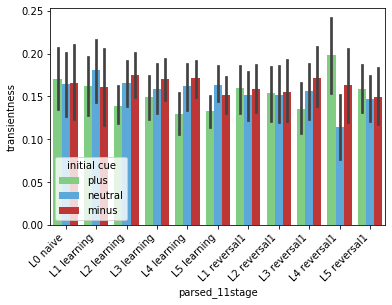

In [479]:
myvars = ['L0 naive',
          'L1 learning', 'L2 learning', 'L3 learning',
          'L4 learning', 'L5 learning',
          'L1 reversal1', 'L2 reversal1', 'L3 reversal1',
          'L4 reversal1', 'L5 reversal1']

group_df = trans_df_proj.groupby(['mouse', 'cell', 'best component', 'initial cue', 'parsed_11stage']).mean()
test_df = group_df.loc[group_df['transientness'].lt(0.4)]
sns.barplot(data=test_df['transientness'].reset_index(), y='transientness', x='parsed_11stage', hue='initial cue',
            order=myvars, palette=cas.lookups.color_dict)
plt.xticks(rotation=45, ha='right')

In [ ]:
trans_df_cells = cas.plotting.adaptation.plot_transientness_scatter_stages(mice,
        words=words,
        method='ncp_hals',
        cs='',
        warp=False,
        trace_type='zscore_day',
        group_by=group_by,
        nan_thresh=nan_thresh,
        score_threshold=score_threshold,
        rank=15)

In [ ]:
def originline(a, b, color, label):
#     plt.plot([0,1], [0,1], '--k')
    plt.plot([-4,4], [-4,4], '--k')
    plt.plot([0,0], [-4,4], '--k')
    plt.plot([-4,4], [0,0], '--k')
    plt.ylim(-4, 4)
    plt.xlim(-4, 4)


group_df = trans_df_cells.groupby(['mouse', 'cell', 'best component', 'initial cue', 'parsed_11stage']).mean()['ramp index']
g = sns.PairGrid(group_df.unstack(level=-1).reset_index(), hue='initial cue', height=4,
                 palette=cas.lookups.color_dict,
#                  vars=['low_dp learning', 'high_dp learning'])
#                  vars=['early low_dp learning', 'late low_dp learning', 'early high_dp learning', 'late high_dp learning'])
                 vars=['L1 learning', 'L2 learning', 'L3 learning', 'L4 learning', 'L5 learning'])
g = g.map_offdiag(sns.scatterplot, alpha=0.8)
g = g.map_offdiag(originline)
g = g.map_diag(sns.kdeplot, shade=True)

plt.suptitle('Ramp index by cells, binned by dprime, cols x rows', y=1.05, size=18)

# plt.savefig(os.path.join(save_folder, 'transient_scatter_cells_rampindex.png'), bbox_inches='tight')

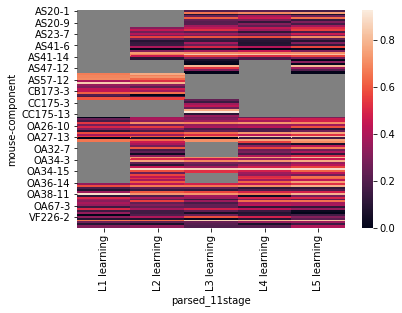

In [527]:
group_df = trans_df.groupby(['mouse', 'best component', 'parsed_11stage']).mean()['transientness']
unstacked_df = group_df.unstack('parsed_11stage')
comps = unstacked_df.reset_index()
trans_comp = unstacked_df.reset_index().rename(columns={'best component': 'component'})
trans_comp['component'] = trans_comp['component'] + 1
trans_comp = trans_comp.set_index(['mouse', 'component'])

g = sns.heatmap(trans_comp)
g.set_facecolor('gray')

In [ ]:
# create dataframes - ignore python and numpy divide by zero warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    with np.errstate(invalid='ignore', divide='ignore'):
        clustering_df, t_df = \
            cas.df.groupmouse_trialfac_summary_stages(
                mice=mice,
                trace_type=trace_type,
                method='ncp_hals',
                words=words,
                group_by=group_by,
                nan_thresh=nan_thresh,
                score_threshold=score_threshold,
                rank_num=rank_num,
                verbose=False)

In [10]:
tempo_dfs = cas.df.load_tempfac_dfs(
                mice=mice,
                trace_type=trace_type,
                method='ncp_hals',
                words=words,
                group_by=group_by,
                nan_thresh=nan_thresh,
                score_threshold=score_threshold,
                rank=rank_num,
                interp_2s=True)

Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match le

In [ ]:
trifa = cas.df.load_trialfac_df_tuning(
                mice=mice,
                trace_type=trace_type,
                method='ncp_hals',
                words=words,
                group_by=group_by,
                nan_thresh=nan_thresh,
                score_threshold=score_threshold,
                rank=rank_num,
                staging='parsed_11stage',
                tuning=True)

In [429]:
dap = cas.df.load_daily_ramp_df_stages(mice,
                trace_type=trace_type,
                method='ncp_hals',
                words=words,
                group_by=group_by,
                nan_thresh=nan_thresh,
                score_threshold=score_threshold,
                rank=rank_num,
                staging='parsed_11stage')

Mice hashed: counted


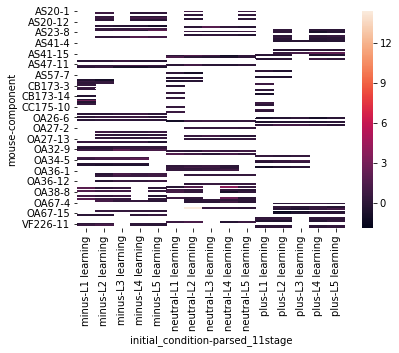

In [430]:
sns.heatmap(dap)

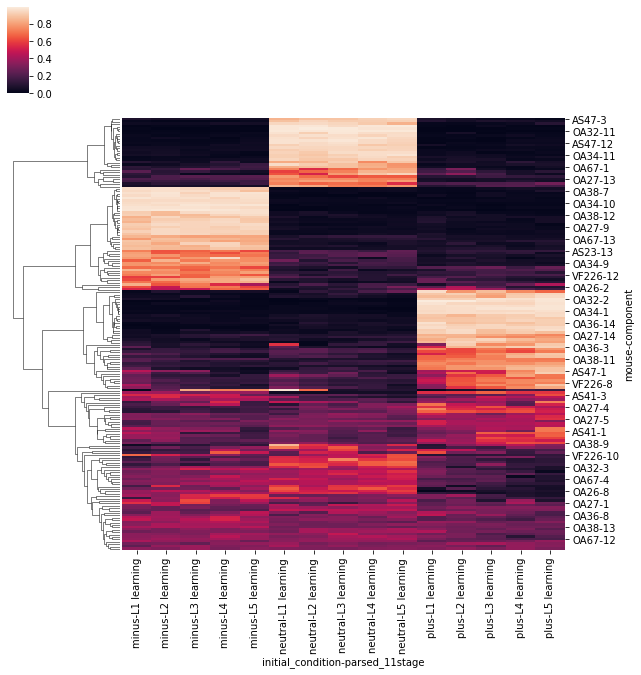

In [13]:
sns.clustermap(trifa.dropna(axis=0), col_cluster=False)

# trifa[0].unstack(level=['initial_condition']).unstack(level=['parsed_11stage'])

Text(0.5, 1, 'Betas per filter')

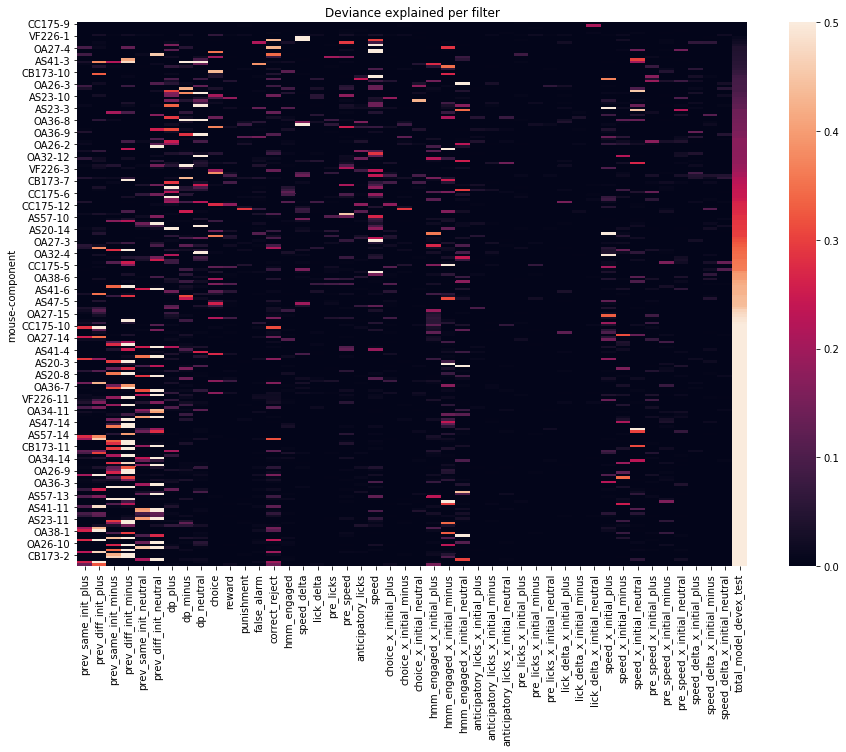

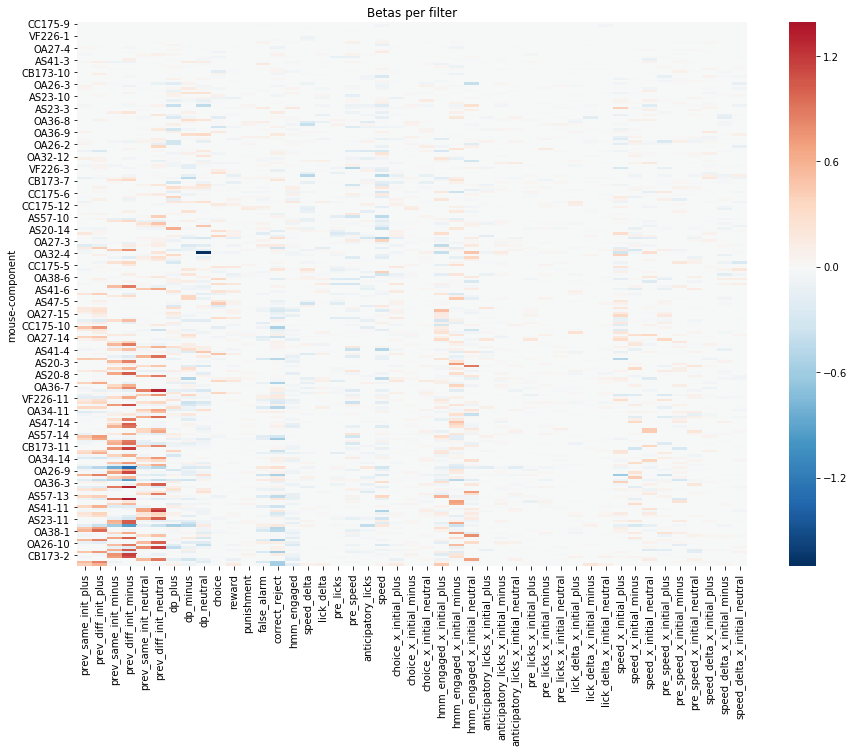

In [14]:
added_col_df = all_mfdev_df.merge(all_mdev_df['total_model_devex_test'], how='left', 
                                  left_index=True, right_index=True)
sorter = all_mdev_df['total_model_devex_test'].argsort()
beta_df = pd.DataFrame(data=np.stack(all_mdev_df['beta_w'].values, axis=0), 
                       columns=all_mfdev_df.columns, index=added_col_df.index)

plt.figure(figsize=(15,10))
sns.heatmap(added_col_df.iloc[sorter, :], vmin=0, vmax=0.5)
plt.title('Deviance explained per filter')

plt.figure(figsize=(15,10))
sns.heatmap(beta_df.iloc[sorter, :], center=0, cmap='RdBu_r')
plt.title('Betas per filter')
# plt.savefig(os.path.join(save_folder, 'GLM devex heatmap vm50.png'), bbox_inches='tight')

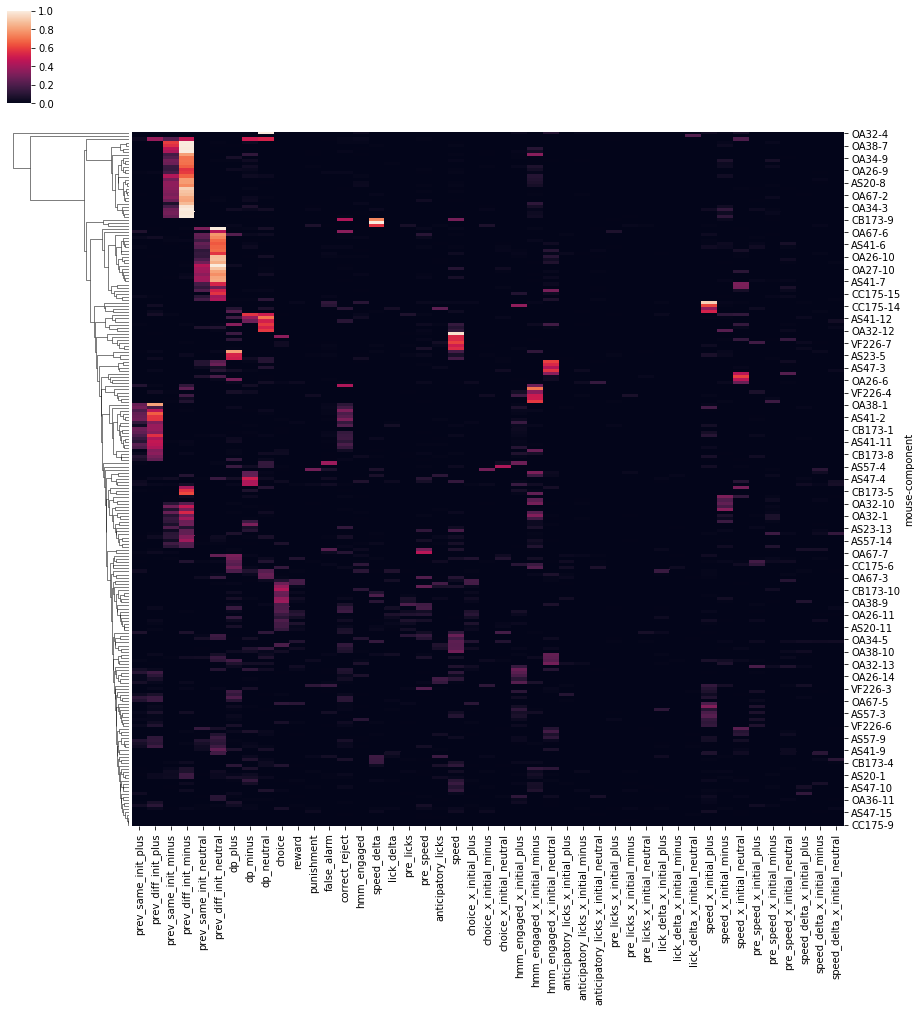

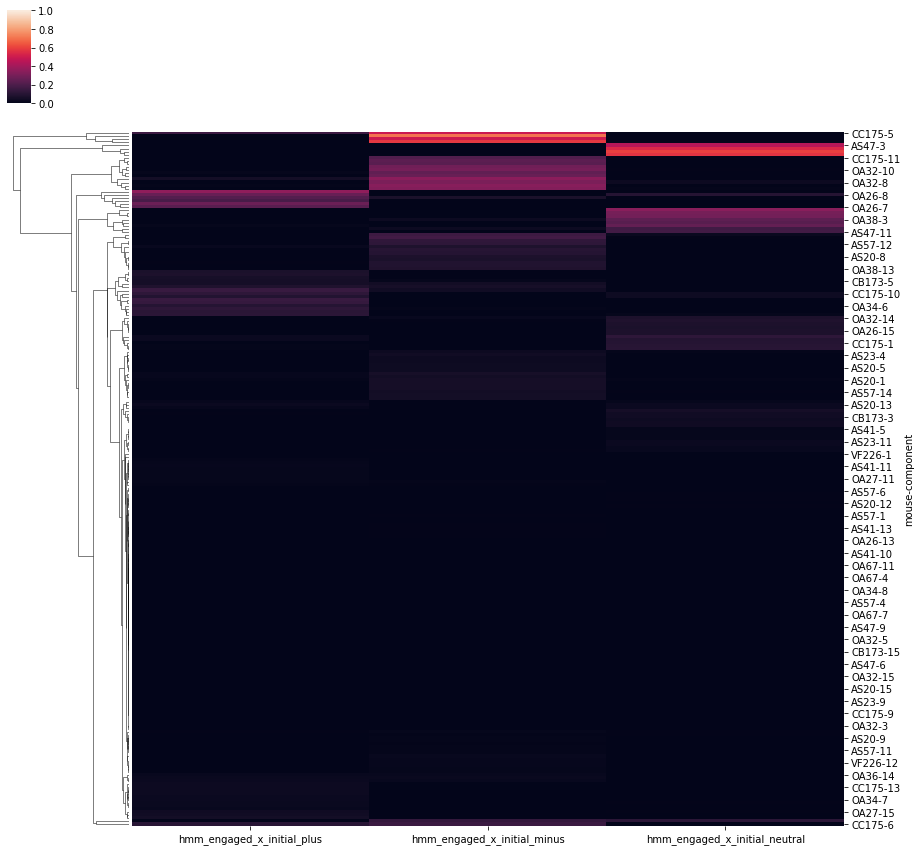

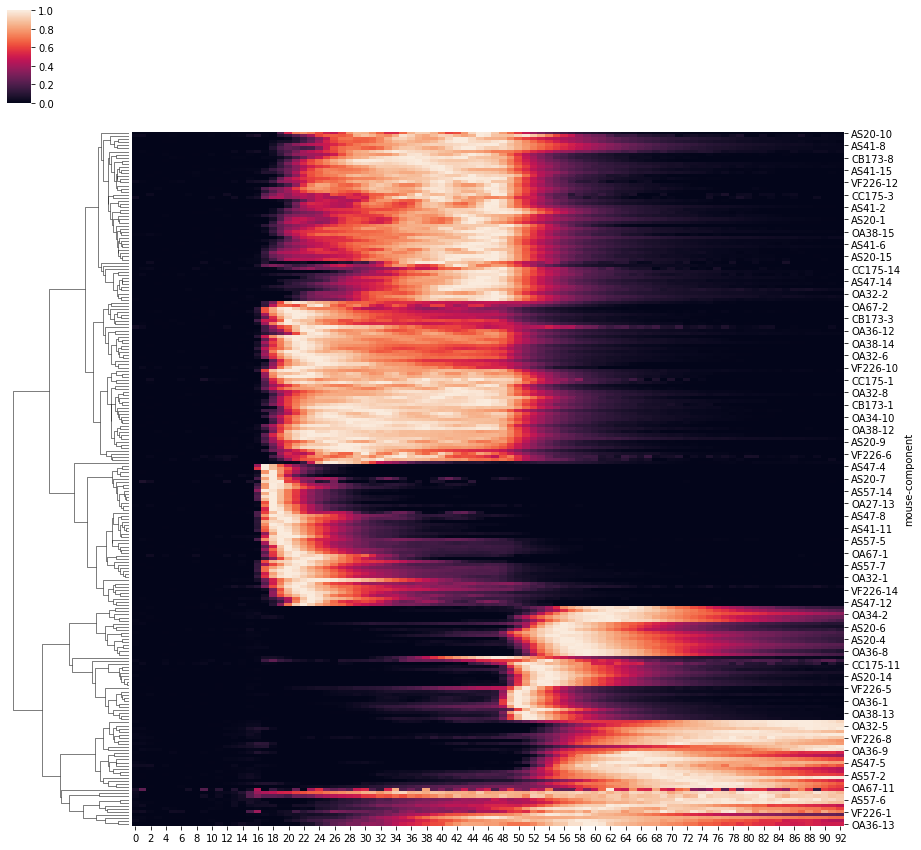

In [15]:
g = sns.clustermap(all_mfdev_df, figsize=(15,15), col_cluster=False, vmax=1, vmin=0)
clus_sort = g.dendrogram_row.reordered_ind

hmm_cols = ['hmm_engaged_x_initial_plus', 'hmm_engaged_x_initial_minus', 'hmm_engaged_x_initial_neutral']
g = sns.clustermap(all_mfdev_df.loc[:, hmm_cols], figsize=(15,15), col_cluster=False, vmax=1, vmin=0)
hmm_sort = g.dendrogram_row.reordered_ind

g = sns.clustermap(tempo_dfs.dropna(axis=1), figsize=(15,15), col_cluster=False, vmax=1, vmin=0, standard_scale=0)
temp_sort = g.dendrogram_row.reordered_ind


array([0.95, 0.95, 0.95, 1.  ])

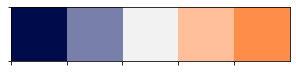

In [98]:
# cmap = sns.color_palette('PuOr', )
top = sns.diverging_palette(264, 30, l=7, s=99, n=5, center='light', as_cmap=False)
bot = sns.diverging_palette(264, 30, l=70, s=99, n=5, center='light', as_cmap=False)
dark_light = [top, bot]
cmap = [dark_light[0][c] if c < int(np.ceil(len(top)/2)) else dark_light[1][c] for c in range(len(top))]
# cmap[int(np.floor(len(top)/2))] = tuple([c*.85 for c in cmap[int(np.floor(len(top)/2))]])
sns.palplot(cmap)
# cmap = sns.color_palette(cmap)
cmap[2]

In [17]:
cmap = sns.blend_palette([[0.00228875, 0.04398078, 0.29946243, 1.        ],
                          [0.95, 0.95, 0.95, 1.  ],
                          [0.99767965, 0.55376315, 0.28949242, 1.        ]], as_cmap=True) 
# sns.palplot(cmap)

Text(0.5, 114.0, 'transientness index (a / a + b) from NNLS fitting')

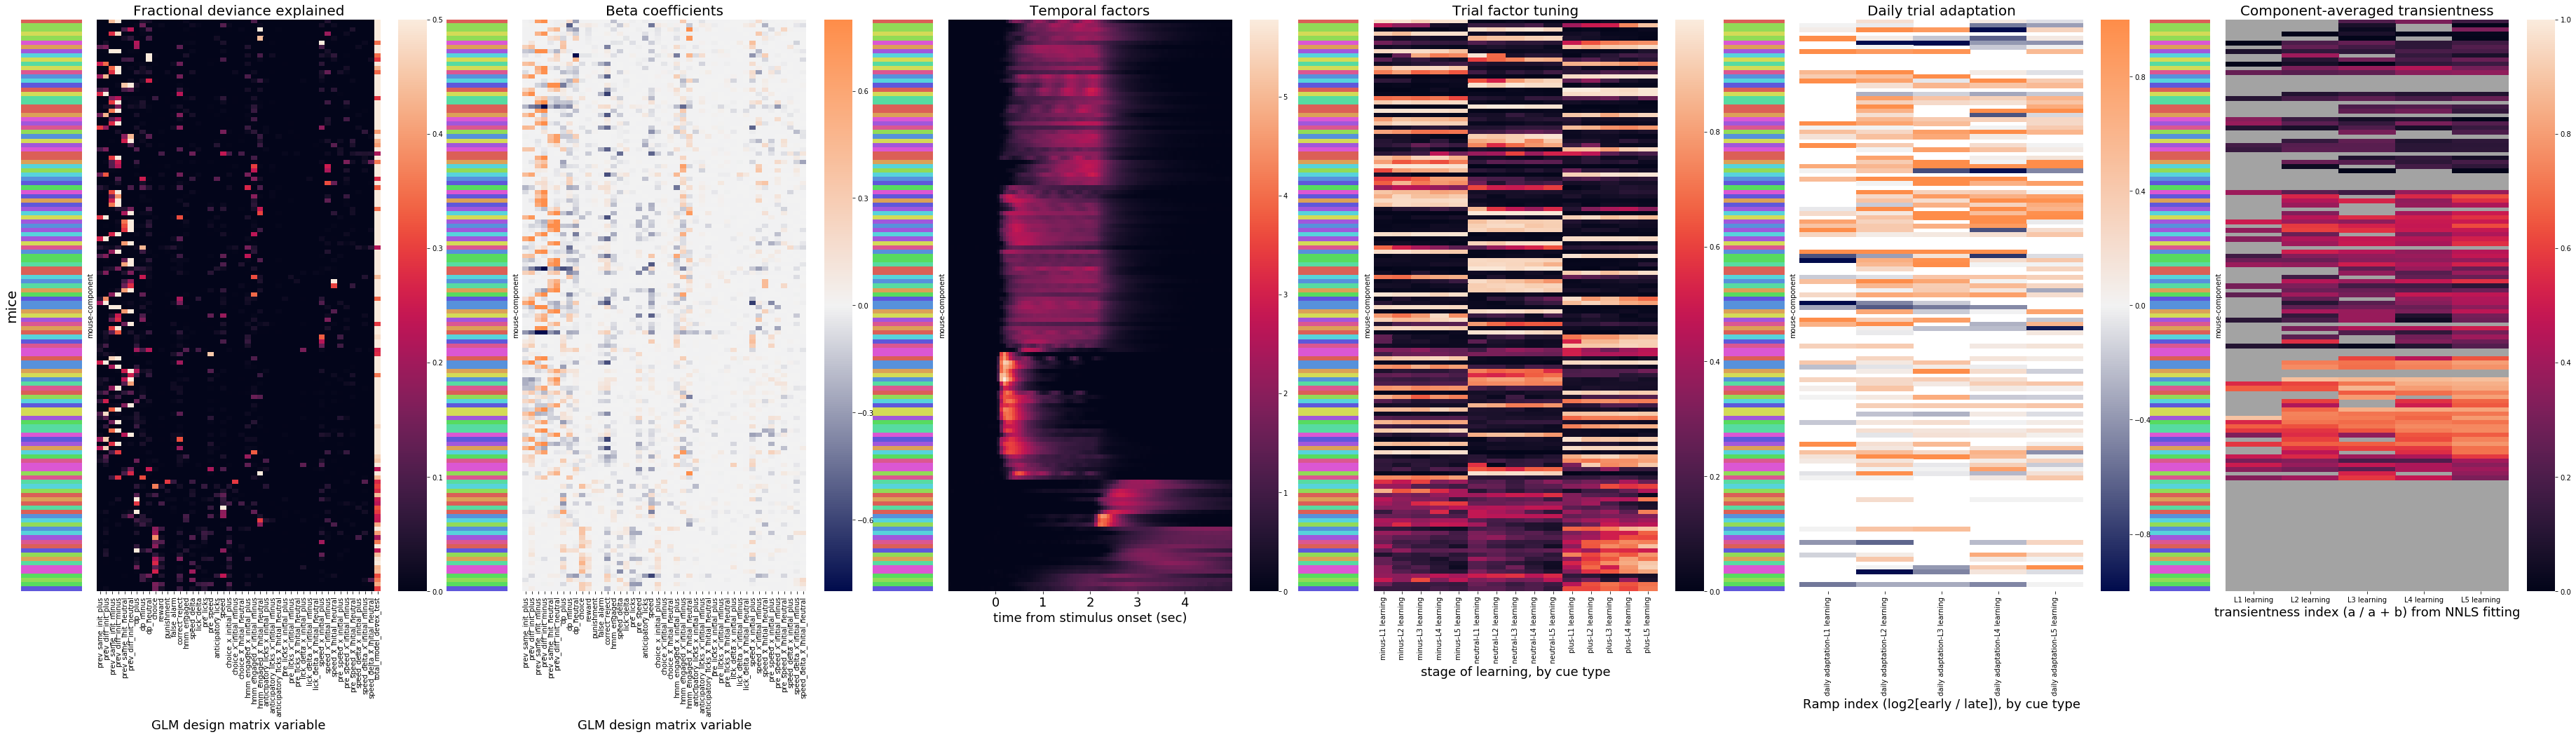

In [432]:
plot_sort = temp_sort #clus_sort
sub_mice = True
resort = False

devex_thresh = added_col_df.iloc[plot_sort, -1].gt(.2) 

devex_plot_df = added_col_df.iloc[plot_sort, :].loc[devex_thresh]
tempo_plot_df = tempo_dfs.iloc[plot_sort, :].loc[devex_thresh]
beta_plot_df = beta_df.iloc[plot_sort, :].loc[devex_thresh]
day_adapt_plot_df = dap.reindex(index=tempo_dfs.index).iloc[plot_sort, :].loc[devex_thresh]
trans_adapt_plot_df = trans_df.reindex(index=tempo_dfs.index).iloc[plot_sort, :].loc[devex_thresh]
    
heat_cols = [
 'plus_low_dp_learning', 'plus_high_dp_learning', 
 'minus_low_dp_learning', 'minus_high_dp_learning', 
 'neutral_low_dp_learning', 'neutral_high_dp_learning',
]
# clustering_plot_df = clustering_df.loc[:, heat_cols].iloc[plot_sort, :].loc[devex_thresh]
clustering_plot_df = trifa.iloc[plot_sort, :].loc[devex_thresh]

# subselect
if sub_mice:
    msub = devex_plot_df.reset_index()['mouse'].isin(cas.lookups.mice['all12']).values
    devex_plot_df = devex_plot_df.iloc[msub, :]
    tempo_plot_df = tempo_plot_df.iloc[msub, :]
    beta_plot_df = beta_plot_df.iloc[msub, :]
    clustering_plot_df = clustering_plot_df.iloc[msub, :]
    day_adapt_plot_df = day_adapt_plot_df.iloc[msub, :]
    trans_adapt_plot_df = trans_adapt_plot_df.iloc[msub, :]

# get alternative daily adaptation to plot
day_frame = day_adapt_plot_df.stack().stack().to_frame('daily adaptation').groupby(['mouse', 'component', 'parsed_11stage']).mean()
day_frame_mean_across_stages = day_frame.groupby(['mouse', 'component']).mean().reindex(index=day_adapt_plot_df.index)
day_frame = day_frame.unstack().reindex(index=day_adapt_plot_df.index)
    
if resort:
    new_sort = np.argsort(trans_adapt_plot_df['L5 learning'].values)
    devex_plot_df = devex_plot_df.iloc[new_sort, :]
    tempo_plot_df = tempo_plot_df.iloc[new_sort, :]
    beta_plot_df = beta_plot_df.iloc[new_sort, :]
    clustering_plot_df = clustering_plot_df.iloc[new_sort, :]
    day_adapt_plot_df = day_adapt_plot_df.iloc[new_sort, :]
    trans_adapt_plot_df = trans_adapt_plot_df.iloc[new_sort, :]
    day_frame = day_frame.iloc[new_sort, :]
    day_frame_mean_across_stages = day_frame_mean_across_stages.iloc[new_sort, :]
    
sub_n = 6
fig, ax = plt.subplots(1, sub_n, figsize=(sub_n*10,15))
fig.subplots_adjust(left=0.08)

for i in range(sub_n):
    pos1 = ax[i].get_position()
    mouse_ax = fig.add_axes([pos1.x0-.025, pos1.y0,  0.02, pos1.height])

    mice_plot = devex_plot_df.reset_index()['mouse'].values
    color_mice = color_mice = {m: c for c, m in enumerate(np.unique(mice_plot))}
    numerical_mice = np.array([color_mice[s] for s in mice_plot])
    sns.heatmap(numerical_mice[:, None], ax=mouse_ax, xticklabels=False, yticklabels=False, cbar=False, 
                cmap=sns.color_palette("hls", len(np.unique(mice_plot))))
    if i == 0:
        mouse_ax.set_ylabel('mice', size=20)
        
sns.heatmap(devex_plot_df, ax=ax[0], vmin=0, vmax=0.5, xticklabels=True,  yticklabels=False)
sns.heatmap(beta_plot_df, ax=ax[1], cmap=cmap, vmin=-0.8, vmax=0.8,
            center=0, xticklabels=True,  yticklabels=False)
sns.heatmap(tempo_plot_df.dropna(axis=1), ax=ax[2],  yticklabels=False)
sns.heatmap(clustering_plot_df, ax=ax[3],  yticklabels=False)
# sns.heatmap(day_adapt_plot_df, ax=ax[4],  yticklabels=False, vmin=-1, vmax=1, center=0, cmap=cmap)
sns.heatmap(day_frame, ax=ax[4],  yticklabels=False, vmin=-1, vmax=1, center=0, cmap=cmap)
# sns.heatmap(day_frame_mean_across_stages, ax=ax[4],  yticklabels=False, vmin=-1, vmax=1, center=0, cmap=cmap)
sns.heatmap(trans_adapt_plot_df, ax=ax[5],  yticklabels=False, vmin=0, vmax=1)

ax[0].set_title('Fractional deviance explained', size=20)
ax[1].set_title('Beta coefficients', size=20)
ax[2].set_title('Temporal factors', size=20)
ax[3].set_title('Trial factor tuning', size=20)
ax[4].set_title('Daily trial adaptation', size=20)
ax[5].set_title('Component-averaged transientness', size=20)

ax[3].set_facecolor('gray')
ax[4].set_facecolor('white')
ax[5].set_facecolor(cas.lookups.color_dict['gray'])

ax[2].set_xticks(np.arange(15.5, 92, 15.5))
ax[2].set_xticklabels(np.arange(5), size=18, rotation=0)

ax[0].set_xlabel('GLM design matrix variable', size=18)
ax[1].set_xlabel('GLM design matrix variable', size=18)
ax[2].set_xlabel('time from stimulus onset (sec)', size=18)
ax[3].set_xlabel('stage of learning, by cue type', size=18)
ax[4].set_xlabel('Ramp index (log2[early / late]), by cue type', size=18)
ax[5].set_xlabel('transientness index (a / a + b) from NNLS fitting', size=18)

In [321]:
beta_plot_df.columns

Index(['prev_same_init_plus', 'prev_diff_init_plus', 'prev_same_init_minus',
       'prev_diff_init_minus', 'prev_same_init_neutral',
       'prev_diff_init_neutral', 'dp_plus', 'dp_minus', 'dp_neutral', 'choice',
       'reward', 'punishment', 'false_alarm', 'correct_reject', 'hmm_engaged',
       'speed_delta', 'lick_delta', 'pre_licks', 'pre_speed',
       'anticipatory_licks', 'speed', 'choice_x_initial_plus',
       'choice_x_initial_minus', 'choice_x_initial_neutral',
       'hmm_engaged_x_initial_plus', 'hmm_engaged_x_initial_minus',
       'hmm_engaged_x_initial_neutral', 'anticipatory_licks_x_initial_plus',
       'anticipatory_licks_x_initial_minus',
       'anticipatory_licks_x_initial_neutral', 'pre_licks_x_initial_plus',
       'pre_licks_x_initial_minus', 'pre_licks_x_initial_neutral',
       'lick_delta_x_initial_plus', 'lick_delta_x_initial_minus',
       'lick_delta_x_initial_neutral', 'speed_x_initial_plus',
       'speed_x_initial_minus', 'speed_x_initial_neutral',
 

In [438]:
fig.savefig(os.path.join(save_folder, 'mega_heatmap_n12mice_newadapt_wmindayn.png'), bbox_inches='tight')

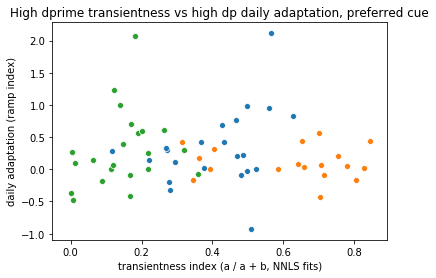

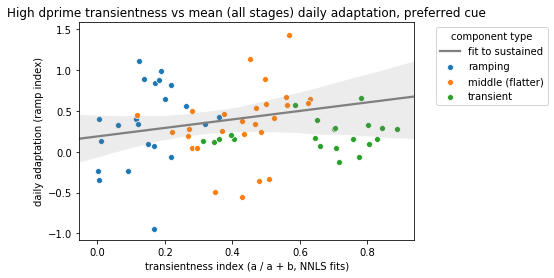

In [434]:
sns.scatterplot(y=day_frame.iloc[:78, -1], x=trans_adapt_plot_df.iloc[:78, -1])
sns.scatterplot(y=day_frame.iloc[78:108, -1], x=trans_adapt_plot_df.iloc[78:108, -1])
sns.scatterplot(y=day_frame.iloc[:38, -1], x=trans_adapt_plot_df.iloc[:38, -1])
plt.title('High dprime transientness vs high dp daily adaptation, preferred cue')
plt.ylabel('daily adaptation (ramp index)')
plt.xlabel('transientness index (a / a + b, NNLS fits)')
# plt.savefig(os.path.join(save_folder, 'trans_vs_daily_adapt_highdp_scatter.png'), bbox_inches='tight')


trans_mean = trans_adapt_plot_df.mean(axis=1)
plt.figure()
sns.scatterplot(y=day_frame_mean_across_stages.iloc[:38, -1], x=trans_adapt_plot_df.iloc[:38, -1], label='ramping')
sns.scatterplot(y=day_frame_mean_across_stages.iloc[38:78, -1],
                x=trans_adapt_plot_df.iloc[38:78, -1],
                label='middle (flatter)')
sns.scatterplot(y=day_frame_mean_across_stages.iloc[78:108, -1], x=trans_adapt_plot_df.iloc[78:108, -1], label='transient')
sns.regplot(y=day_frame_mean_across_stages.iloc[:78, -1], x=trans_adapt_plot_df.iloc[:78, -1], label='fit to sustained', scatter=False, color='gray')
plt.title('High dprime transientness vs mean (all stages) daily adaptation, preferred cue')
plt.ylabel('daily adaptation (ramp index)')
plt.xlabel('transientness index (a / a + b, NNLS fits)')
# plt.axhline(0, linestyle='--', color='gray')
plt.legend(title='component type', bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [455]:
indy = -2
sns.scatterplot(y=day_frame_mean_across_stages.iloc[:108, indy],
                x=trans_adapt_plot_df.iloc[:108, indy], hue=trans_adapt_plot_df.iloc[:108, indy].reset_index()['mouse'].values)
plt.legend(title='component type', bbox_to_anchor=(1.05, 1.0), loc='upper left')

IndexError: single positional indexer is out-of-bounds

r, p-value (0.43252975834059454, 0.00044665419100661915)


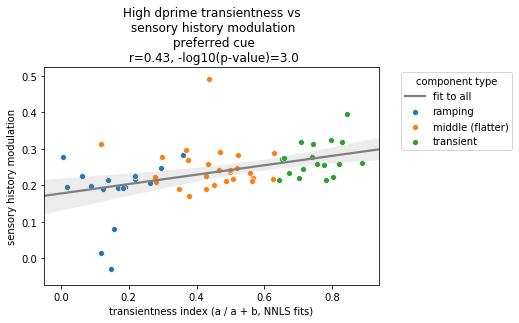

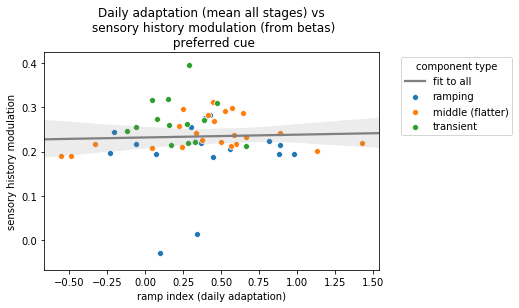

In [436]:
test = cas.adaptation.get_sensory_history_mod_from_betas(beta_plot_df)

trans_mean = trans_adapt_plot_df.mean(axis=1)
plt.figure()
sns.scatterplot(y=test[:38,], x=trans_adapt_plot_df.iloc[:38, -1], label='ramping')
sns.scatterplot(y=test[38:78], x=trans_adapt_plot_df.iloc[38:78, -1], label='middle (flatter)')
sns.scatterplot(y=test[78:108], x=trans_adapt_plot_df.iloc[78:108, -1], label='transient')
sns.regplot(y=test[:108], x=trans_adapt_plot_df.iloc[:108, -1], label='fit to all', scatter=False, color='gray')
no_nans = ~np.isnan(test[:108]) & ~np.isnan(trans_adapt_plot_df.iloc[:108, -1])
r, pv = pearsonr(test[:108][no_nans], trans_adapt_plot_df.iloc[:108, -1].values[no_nans])
print('r, p-value', pearsonr(test[:108][no_nans], trans_adapt_plot_df.iloc[:108, -1].values[no_nans]))
plt.title(f'High dprime transientness vs\n sensory history modulation\n preferred cue\n r={round(r,2)}, -log10(p-value)={round(-1*np.log10(pv))}')
plt.ylabel('sensory history modulation')
plt.xlabel('transientness index (a / a + b, NNLS fits)')
# plt.axhline(0, linestyle='--', color='gray')
plt.legend(title='component type', bbox_to_anchor=(1.05, 1.0), loc='upper left')

trans_mean = trans_adapt_plot_df.mean(axis=1)
plt.figure()
sns.scatterplot(y=test[:38,], x=day_frame_mean_across_stages.iloc[:38, -1], label='ramping')
sns.scatterplot(y=test[38:78], x=day_frame_mean_across_stages.iloc[38:78, -1], label='middle (flatter)')
sns.scatterplot(y=test[78:108], x=day_frame_mean_across_stages.iloc[78:108, -1], label='transient')
sns.regplot(y=test[:108], x=day_frame_mean_across_stages.iloc[:108, -1], label='fit to all', scatter=False, color='gray')
plt.title('Daily adaptation (mean all stages) vs\n sensory history modulation (from betas)\n preferred cue')
plt.ylabel('sensory history modulation')
plt.xlabel('ramp index (daily adaptation)')
# plt.axhline(0, linestyle='--', color='gray')
plt.legend(title='component type', bbox_to_anchor=(1.05, 1.0), loc='upper left')

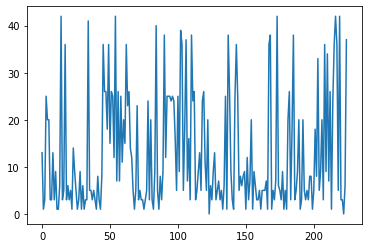

In [386]:
plt.plot(np.argmax(beta_df.values, axis=1))

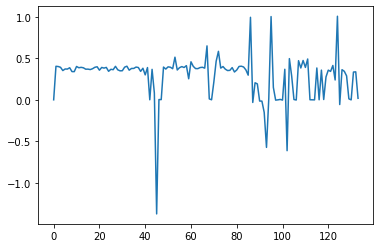

In [389]:
plt.plot(test)

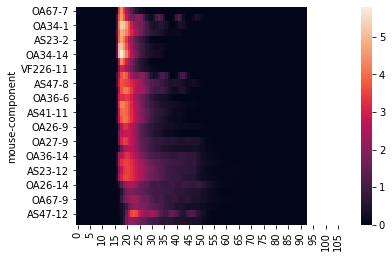

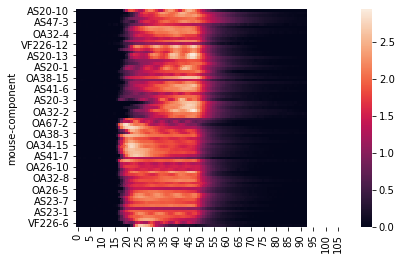

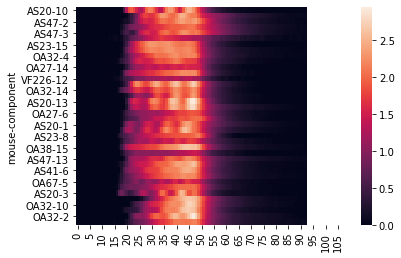

In [340]:
sns.heatmap(tempo_plot_df.iloc[78:108])
plt.figure()
sns.heatmap(tempo_plot_df.iloc[:78])
plt.figure()
sns.heatmap(tempo_plot_df.iloc[:38])

Text(0, 0.5, 'Beta coefficients')

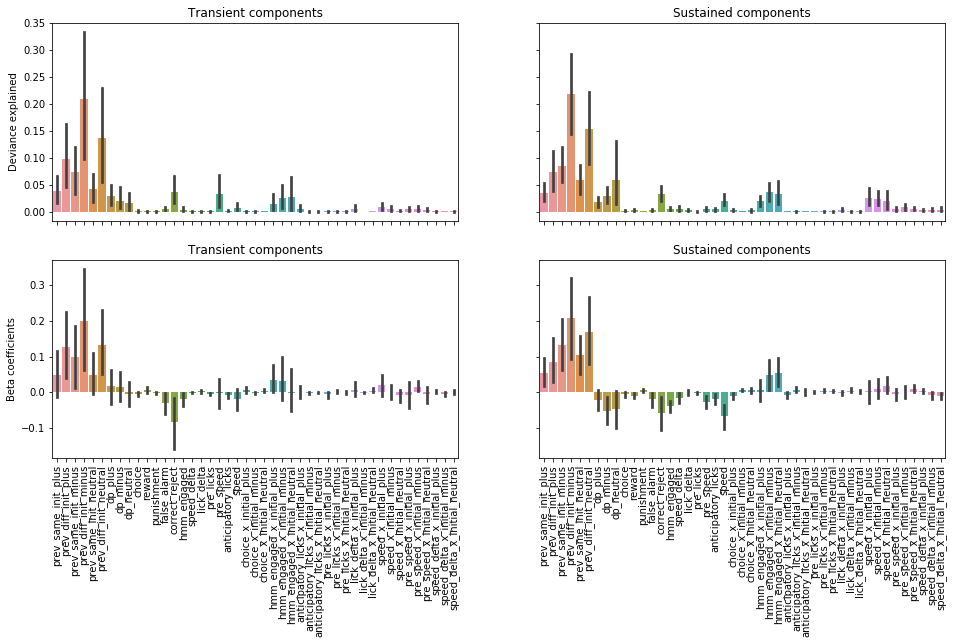

In [31]:
transeint_df = devex_plot_df.iloc[78:108]
sustained_df = devex_plot_df.iloc[:78]

fig, ax = plt.subplots(2, 2, sharey='row', sharex=True, figsize=(16,8))
sns.barplot(data=transeint_df.iloc[:, :-1], ax=ax[0, 0])
sns.barplot(data=sustained_df.iloc[:, :-1], ax=ax[0, 1])
# ax[0, 0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='center');
# ax[0, 1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='center');
ax[0, 0].set_title('Transient components')
ax[0, 1].set_title('Sustained components')
ax[0, 0].set_ylabel('Deviance explained')

transeint_df = beta_plot_df.iloc[78:108]
sustained_df = beta_plot_df.iloc[:78]

sns.barplot(data=transeint_df.iloc[:, :], ax=ax[1, 0])
sns.barplot(data=sustained_df.iloc[:, :], ax=ax[1, 1])
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=90, ha='center');
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90, ha='center');
ax[1, 0].set_title('Transient components')
ax[1, 1].set_title('Sustained components')
ax[1, 0].set_ylabel('Beta coefficients')

# sns.heatmap(tempo_plot_df.iloc[78:108], ax=ax[2,0])
# sns.heatmap(tempo_plot_df.iloc[:78], ax=ax[2,1])

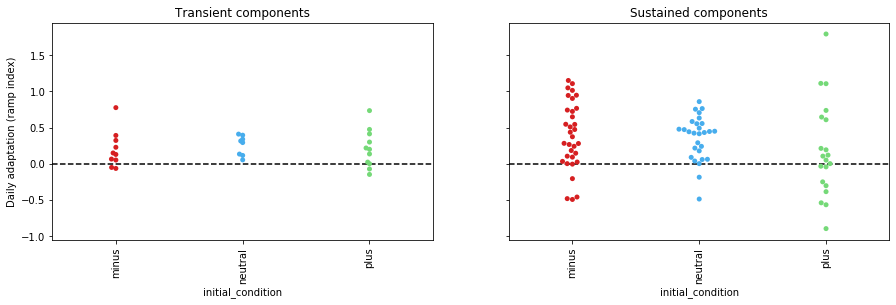

In [367]:
transient_df = day_adapt_plot_df.iloc[78:108]
sustained_df = day_adapt_plot_df.iloc[:78]

fig, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15,4))
sns.swarmplot(data=transient_df.iloc[:, :], ax=ax[0], palette=cas.lookups.color_dict)
sns.swarmplot(data=sustained_df.iloc[:, :], ax=ax[1], palette=cas.lookups.color_dict)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='center');
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='center');
ax[0].set_title('Transient components')
ax[1].set_title('Sustained components')
ax[0].set_ylabel('Daily adaptation (ramp index)')
ax[0].axhline(0, linestyle='--', color='black')
ax[1].axhline(0, linestyle='--', color='black')

In [ ]:
jointmax

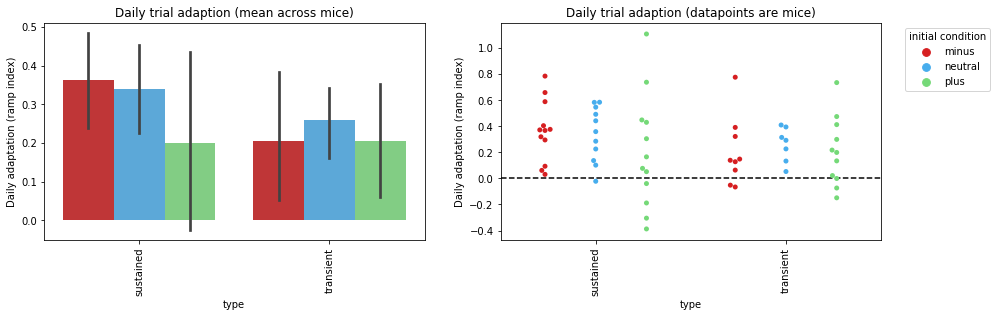

In [368]:
transient_df = day_adapt_plot_df.iloc[78:108].stack().to_frame('ramp index')
sustained_df = day_adapt_plot_df.iloc[:78].stack().to_frame('ramp index')

transient_df['type'] = 'transient'
sustained_df['type'] = 'sustained'
jointmax = pd.concat([sustained_df, transient_df])
jointmax = jointmax.groupby(['mouse', 'initial_condition', 'type']).mean().reset_index()

fig, ax = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4))
sns.barplot(data=jointmax.reset_index(), x='type', y='ramp index', hue='initial_condition', ax=ax[0], palette=cas.lookups.color_dict)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='center');
ax[0].set_title('Daily trial adaption (mean across mice)')
ax[0].set_ylabel('Daily adaptation (ramp index)')
ax[0].get_legend().set_visible(False)
# ax[0].axhline(0, linestyle='--', color='black')

sns.swarmplot(data=jointmax.reset_index(), x='type', y='ramp index', hue='initial_condition', ax=ax[1], palette=cas.lookups.color_dict,
             dodge=True)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='center');
ax[1].set_title('Daily trial adaption (datapoints are mice)')
ax[1].set_ylabel('Daily adaptation (ramp index)')
ax[1].axhline(0, linestyle='--', color='black')
ax[1].legend(title='initial condition', bbox_to_anchor=(1.05, 1.0))

TypeError: 'generator' object is not subscriptable

Text(0.5, 1.0, 'Ramp index for preffered tuning (all components)')

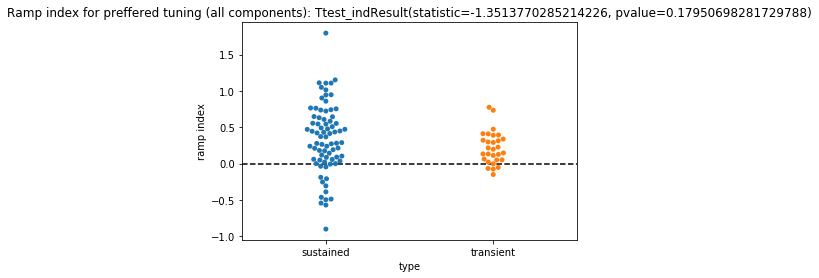

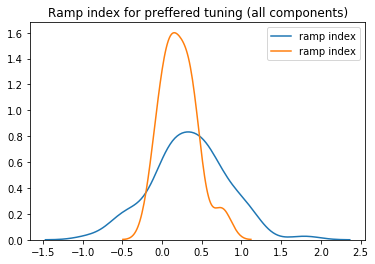

In [369]:
transient_df = day_adapt_plot_df.iloc[78:108]
sustained_df = day_adapt_plot_df.iloc[:78]
tmax = transient_df.mean(axis=1).to_frame('ramp index')
smax = sustained_df.mean(axis=1).to_frame('ramp index')
tmax['type'] = 'transient'
smax['type'] = 'sustained'
jointmax = pd.concat([smax, tmax])
# sns.barplot(data=jointmax, y='ramp index', x='type')
plt.figure()
sns.swarmplot(data=jointmax, y='ramp index', x='type')
from scipy.stats import ttest_ind
ttest = ttest_ind(tmax['ramp index'].dropna().values, smax['ramp index'].dropna().values)
plt.axhline(0, linestyle='--', color='black')
plt.title(f'Ramp index for preffered tuning (all components): {ttest}')

plt.figure()
sns.kdeplot(data=jointmax.loc[jointmax['type'].isin(['sustained'])]['ramp index'])
sns.kdeplot(data=jointmax.loc[jointmax['type'].isin(['transient'])]['ramp index'])
# plt.axhline(0, linestyle='--', color='black')
plt.title('Ramp index for preffered tuning (all components)')

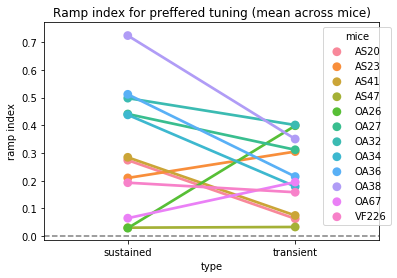

In [370]:

sns.pointplot(data=jointmax.groupby(['mouse', 'type']).mean().reset_index(), y='ramp index', x='type', hue='mouse')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Ramp index for preffered tuning (mean across mice)')
plt.legend(title='mice', bbox_to_anchor=(1.05, 1.0))

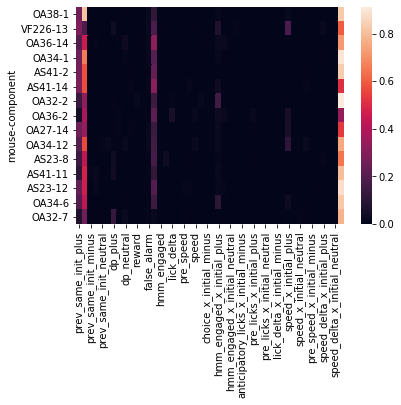

In [165]:
sns.heatmap(devex_plot_df.iloc[52:67])

In [151]:
beta_plot_df.iloc[52:67].groupby(['mouse']).count()

,prev_same_init_plus,prev_diff_init_plus,prev_same_init_minus,prev_diff_init_minus,prev_same_init_neutral,prev_diff_init_neutral,dp_plus,dp_minus,dp_neutral,choice,...,lick_delta_x_initial_neutral,speed_x_initial_plus,speed_x_initial_minus,speed_x_initial_neutral,pre_speed_x_initial_plus,pre_speed_x_initial_minus,pre_speed_x_initial_neutral,speed_delta_x_initial_plus,speed_delta_x_initial_minus,speed_delta_x_initial_neutral
mouse,,,,,,,,,,,,,,,,,,,,,
AS23,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
AS41,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
OA27,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
OA32,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
OA34,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
OA36,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
OA38,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
VF226,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# TODO
- Model selection beyond cv. Should I use AIC and a defined set of models? Then go with best Akaike weight?
- Defining the shape of a cell from TCA. Simple count of how many cells had weights to a certain shape of stimulus?
- Do you want to use NNLS here? Should be done on average traces. Smaller bins may help here across reversal. 


    - hold two dimension fixed in TCA and fit third.

In [541]:
save_folder

'S:\\twophoton_analysis\\Data\\analysis\\Group-counted\\tensors-group-zscore_day-learning-facilitate\\cvGLM trial history motor interactions FA nomiss score 0.8 nantrial 0.95\\learning ncp_hals rank15'